# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import calendar

# Loading Data Set

In [2]:
df_2017 = pd.read_csv('NYC_Taxi_Trips/taxi_trips/2017_taxi_trips.csv')


# Exploring Data

In [3]:
df_2017['lpep_pickup_datetime'] = pd.to_datetime(df_2017['lpep_pickup_datetime'])

# Filter rows where the year is not 2017
rows_not_2017 = df_2017[df_2017['lpep_pickup_datetime'].dt.year != 2017]
rows_not_2017_indices = df_2017[df_2017['lpep_pickup_datetime'].dt.year != 2017].index
df_2017.drop(rows_not_2017_indices, inplace=True)

In [3]:
df_2017.shape

(11740667, 18)

In [5]:
df_2017.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                27
dtype: int64

In [6]:
df_2017.dropna(inplace=True)

In [7]:
df_2017.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

In [5]:
df_2017.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,1,2017-01-01 09:00:01.000,2017-01-01 09:03:56.000,N,1,74,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
1,1,2017-01-01 18:57:55.000,2017-01-01 19:01:16.000,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
2,2,2017-01-02 06:55:47.000,2017-01-02 06:58:54.000,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
3,2,2017-01-02 14:34:17.000,2017-01-02 14:39:29.000,N,1,74,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
4,1,2017-01-03 06:12:30.000,2017-01-03 06:15:56.000,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0


In [8]:
df_2017.describe()

,VendorID,lpep_pickup_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1.174044e+07,11740443,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07,1.174044e+07
mean,1.804663e+00,2017-06-23 08:51:52.712032256,1.077561e+00,1.118996e+02,1.290600e+02,1.364450e+00,2.684422e+00,1.179500e+01,3.527393e-01,4.879360e-01,1.149690e+00,1.036452e-01,2.930482e-01,1.424197e+01,1.506124e+00,1.018406e+00
min,1.000000e+00,2017-01-01 00:00:01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.010000e+02,-8.000000e+01,-3.000000e-01,-4.800000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,2017-03-23 17:33:08,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,2017-06-15 12:19:04,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.750000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,2017-09-23 14:03:30.500000,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.300000e+00,1.450000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.694000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,2017-12-31 23:59:59,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,6.400000e+02,6.003500e+03,3.000000e+01,8.300000e-01,4.495600e+02,7.999920e+03,3.000000e-01,8.999910e+03,5.000000e+00,2.000000e+00
std,3.964596e-01,NaN,5.426443e-01,7.588117e+01,7.723213e+01,1.039243e+00,2.828530e+00,9.875209e+00,3.891529e-01,8.338799e-02,2.173318e+00,2.662617e+00,4.924327e-02,1.151091e+01,5.245947e-01,1.344142e-01


In [8]:
pd.options.display.float_format = '{:.0f}'.format
df_2017.describe()

,VendorID,lpep_pickup_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443,11740443
mean,2,2017-06-23 08:51:52.712032256,1,112,129,1,3,12,0,0,1,0,0,14,2,1
min,1,2017-01-01 00:00:01,1,1,1,0,0,-480,-4,-0,-101,-80,-0,-480,1,1
25%,2,2017-03-23 17:33:08,1,49,61,1,1,6,0,0,0,0,0,8,1,1
50%,2,2017-06-15 12:19:04,1,82,129,1,2,9,0,0,0,0,0,11,1,1
75%,2,2017-09-23 14:03:30.500000,1,166,193,1,3,14,0,0,2,0,0,17,2,1
max,2,2017-12-31 23:59:59,99,265,265,9,640,6004,30,1,450,8000,0,9000,5,2
std,0,NaN,1,76,77,1,3,10,0,0,2,3,0,12,1,0


# Removing negative/ invalid values

In [9]:


numeric_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount']
df_2017[numeric_columns] = df_2017[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_2017 = df_2017[(df_2017[numeric_columns] >= 0).all(axis=1)]

In [10]:
#dropping rows with zero fare and distance
df_2017 = df_2017[(df_2017['fare_amount'] != 0) & (df_2017['trip_distance'] != 0)]

# Reset index after dropping rows
df_2017.reset_index(drop=True, inplace=True)

In [11]:
df_2017.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime', 'PULocationID': 'pickup_location', 'DOLocationID': 'dropoff_location'}, inplace=True)

In [10]:
df_2017.describe()

,VendorID,RatecodeID,pickup_location,dropoff_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085,11562085
mean,2,1,112,129,1,3,12,0,0,1,0,0,14,2,1
std,0,0,76,77,1,3,9,0,0,2,1,0,11,1,0
min,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1
25%,2,1,49,61,1,1,6,0,0,0,0,0,8,1,1
50%,2,1,82,129,1,2,9,0,0,0,0,0,11,1,1
75%,2,1,166,193,1,3,14,0,0,2,0,0,17,2,1
max,2,6,265,265,9,640,6004,30,1,450,1591,0,6004,5,2


In [19]:
high_fare=df_2017[df_2017['fare_amount']>1000]
print(high_fare)

         VendorID          pickup_datetime         dropoff_datetime  \
1210265         2  2017-08-01 07:19:40.000  2017-08-01 14:12:40.000   
8642928         1  2017-11-18 15:50:54.000  2017-11-18 15:53:15.000   

        store_and_fwd_flag  RatecodeID  pickup_location  dropoff_location  \
1210265                  N           1               37                36   
8642928                  N           1               82                82   

         passenger_count  trip_distance  fare_amount  extra  mta_tax  \
1210265                1              1         1646      0        0   
8642928                1              0         6004      0        0   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
1210265           0             0                      0          1647   
8642928           0             0                      0          6004   

         payment_type  trip_type  
1210265             2          1  
8642928             2          1  


# Data Wrangling

In [12]:
#converting pickup and dropoff datetime into proper date time format

df_2017['pickup_datetime'] = pd.to_datetime(df_2017['pickup_datetime'])
df_2017['dropoff_datetime'] = pd.to_datetime(df_2017['dropoff_datetime'])

In [14]:
#creating pickup and dropoff month

df_2017['pickup_month'] = df_2017['pickup_datetime'].dt.month
df_2017['dropoff_month'] = df_2017['dropoff_datetime'].dt.month
df_2017['pickup_month'] = pd.Categorical(df_2017['pickup_month'])
df_2017['dropoff_month'] = pd.Categorical(df_2017['dropoff_month'])

In [15]:
df_2017['pickup_month_name'] = df_2017['pickup_datetime'].dt.month_name()
df_2017['pickup_month_name'] = pd.Categorical(df_2017['pickup_month_name'])


In [16]:
#creating pickup and dropoff date
df_2017['pickup_date'] = df_2017['pickup_datetime'].dt.day
df_2017['dropoff_date'] = df_2017['dropoff_datetime'].dt.day
df_2017['pickup_date'] = pd.Categorical(df_2017['pickup_date'])
df_2017['dropoff_date'] = pd.Categorical(df_2017['dropoff_date'])


In [17]:
#creating pickup and dropoff day
df_2017['pickup_day'] = df_2017['pickup_datetime'].dt.day_name()
df_2017['dropoff_day'] = df_2017['dropoff_datetime'].dt.day_name()
df_2017['pickup_day'] = pd.Categorical(df_2017['pickup_day'])
df_2017['dropoff_day'] = pd.Categorical(df_2017['dropoff_day'])

In [18]:
#creating pickup and dropoff day
df_2017['pickup_weekday'] = df_2017['pickup_datetime'].dt.weekday
df_2017['dropoff_weekday'] = df_2017['dropoff_datetime'].dt.weekday
df_2017['pickup_weekday'] = pd.Categorical(df_2017['pickup_weekday'])
df_2017['dropoff_weekday'] = pd.Categorical(df_2017['dropoff_weekday'])

In [19]:
#creating pickup and dropoff hour
df_2017['pickup_hour'] = df_2017['pickup_datetime'].dt.hour
df_2017['dropoff_hour'] = df_2017['dropoff_datetime'].dt.hour
df_2017['pickup_hour'] = pd.Categorical(df_2017['pickup_hour'])
df_2017['dropoff_hour'] = pd.Categorical(df_2017['dropoff_hour'])


In [20]:
def timezone(x):
    if x >= 6 and x < 10:
        return "morning"
    elif x >= 10 and x < 16:
         return "mid day"
    elif x >= 16 and x < 22:
         return "evening"
    else:
         return "late night"

In [22]:
df_2017['pickup_timezone']=df_2017.pickup_hour.apply(timezone)
df_2017['pickup_timezone'] = pd.Categorical(df_2017['pickup_timezone'])

In [23]:
df_2017.head()

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location,dropoff_location,passenger_count,trip_distance,fare_amount,...,pickup_month_name,pickup_date,dropoff_date,pickup_day,dropoff_day,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_timezone
0,1,2017-01-01 09:00:01,2017-01-01 09:03:56,N,1,74,41,1,1,5,...,January,1,1,Sunday,Sunday,6,6,9,9,morning
1,1,2017-01-01 18:57:55,2017-01-01 19:01:16,N,1,42,41,1,1,5,...,January,1,1,Sunday,Sunday,6,6,18,19,evening
2,2,2017-01-02 06:55:47,2017-01-02 06:58:54,N,1,42,41,1,1,5,...,January,2,2,Monday,Monday,0,0,6,6,morning
3,2,2017-01-02 14:34:17,2017-01-02 14:39:29,N,1,74,41,1,1,5,...,January,2,2,Monday,Monday,0,0,14,14,mid day
4,1,2017-01-03 06:12:30,2017-01-03 06:15:56,N,1,42,41,1,1,5,...,January,3,3,Tuesday,Tuesday,1,1,6,6,morning


# Correlation Matrix 

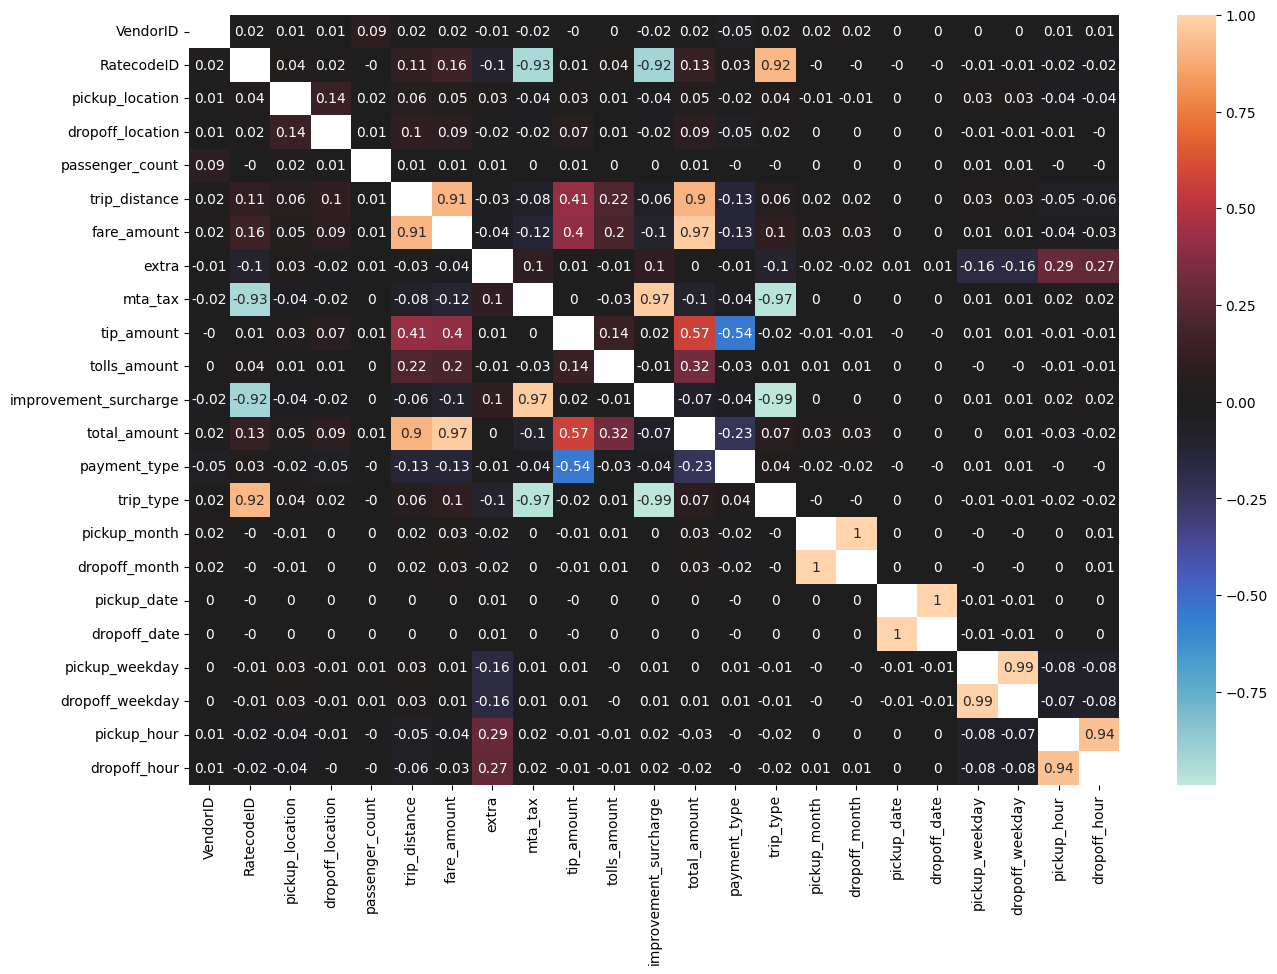

In [18]:
non_numeric_columns = df_2017.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns from the DataFrame
df_numeric = df_2017.drop(non_numeric_columns, axis=1)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr().round(2)

# Set the diagonal to NaN to avoid displaying self-correlation
correlation_matrix *= 1 + np.diag(np.nan*np.ones(len(correlation_matrix)))

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap="icefire")

# Display the plot
plt.show()

## Dropping extra columns

In [24]:


columns_to_drop = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'mta_tax', 'improvement_surcharge']
df_2017.drop(columns=columns_to_drop, inplace=True)

In [23]:
df_2017.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'pickup_location',
       'dropoff_location', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_type',
       'pickup_month', 'dropoff_month', 'pickup_date', 'dropoff_date',
       'pickup_day', 'dropoff_day', 'pickup_weekday', 'dropoff_weekday',
       'pickup_hour', 'dropoff_hour', 'pickup_timezone'],
      dtype='object')

In [31]:
df_2017.head()

,VendorID,pickup_datetime,dropoff_datetime,pickup_location,dropoff_location,passenger_count,trip_distance,fare_amount,extra,tip_amount,...,pickup_month_name,pickup_date,dropoff_date,pickup_day,dropoff_day,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_timezone
0,1,2017-01-01 09:00:01,2017-01-01 09:03:56,74,41,1,1,5,0,0,...,January,1,1,Sunday,Sunday,6,6,9,9,morning
1,1,2017-01-01 18:57:55,2017-01-01 19:01:16,42,41,1,1,5,0,0,...,January,1,1,Sunday,Sunday,6,6,18,19,evening
2,2,2017-01-02 06:55:47,2017-01-02 06:58:54,42,41,1,1,5,0,0,...,January,2,2,Monday,Monday,0,0,6,6,morning
3,2,2017-01-02 14:34:17,2017-01-02 14:39:29,74,41,1,1,5,0,0,...,January,2,2,Monday,Monday,0,0,14,14,mid day
4,1,2017-01-03 06:12:30,2017-01-03 06:15:56,42,41,1,1,5,0,0,...,January,3,3,Tuesday,Tuesday,1,1,6,6,morning


# Exploring both Vendors performance

## Number of trips by each vendor

In [25]:
# number of trips by each Vendor
trips_vendor1 = len(df_2017[df_2017['VendorID'] == 1])
trips_vendor2 = len(df_2017[df_2017['VendorID'] == 2])
print(trips_vendor1)
print(trips_vendor2)

2249902
9311998


## Percentage of trips by vendors

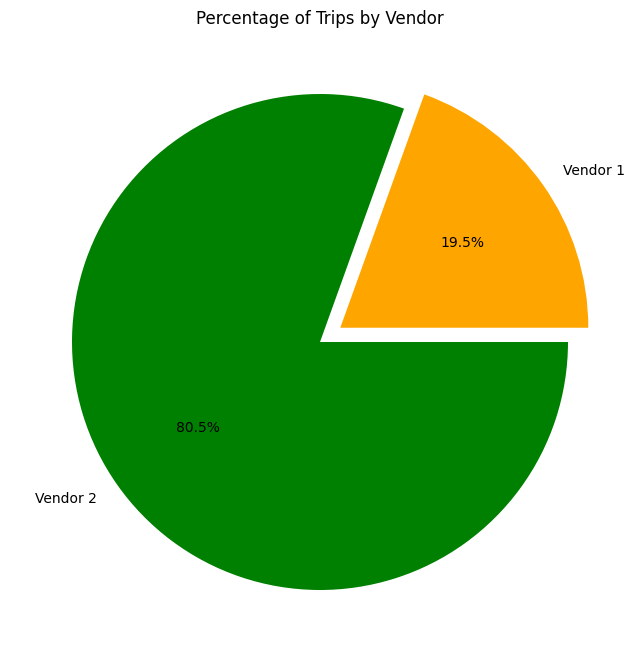

In [26]:
percentage_vendor1=round((trips_vendor1)/len(df_2017)*100,1)
percentage_vendor2=round((trips_vendor2)/len(df_2017)*100,1)
total_percentage=[percentage_vendor1, percentage_vendor2]


# Plotting the pie chart
plt.figure(figsize=(8,10))
plt.pie(total_percentage, explode=(0.1,0), labels=['Vendor 1', 'Vendor 2'], autopct='%1.1f%%', colors=['orange', 'green'])

plt.title('Percentage of Trips by Vendor')


plt.show()

<Axes: xlabel='VendorID', ylabel='trip_distance'>

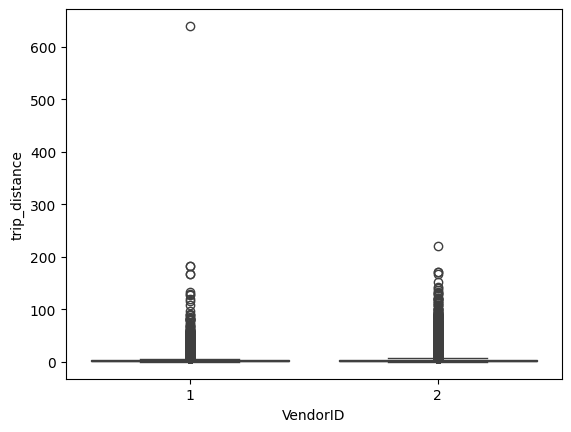

In [27]:
sns.boxplot(x="VendorID", y="trip_distance", data=df_2017)

## Average fare amount per mile by each vendor

VendorID
1    5.718235
2    8.041104
Name: fare_per_mile, dtype: float64


C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_13444\3309701589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fare_per_mile.index, y=average_fare_per_mile.values, palette='viridis')


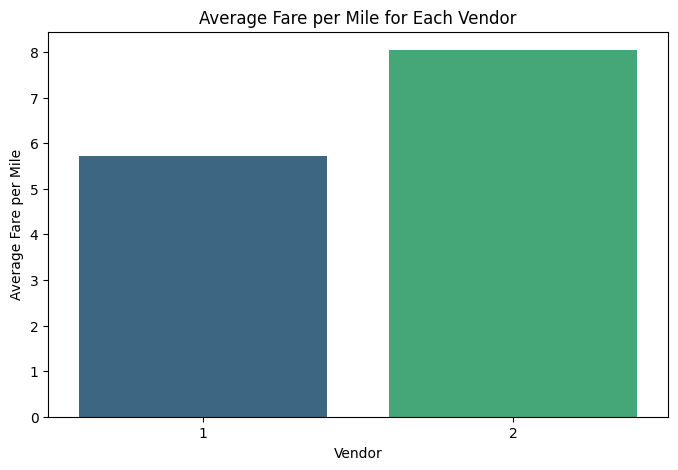

In [56]:
df_2017['fare_per_mile'] = df_2017['fare_amount'] / df_2017['trip_distance']
# Calculate the average fare per mile for each vendor
average_fare_per_mile = df_2017.groupby('VendorID')['fare_per_mile'].mean()

# Display the result
print(average_fare_per_mile)

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_per_mile.index, y=average_fare_per_mile.values, palette='viridis')

# Adding labels and title
plt.xlabel('Vendor')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Each Vendor')

# Display the plot
plt.show()

C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_13444\2255799383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2017['fare_amount'],bins=3, color='green')


<Axes: xlabel='fare_amount', ylabel='Density'>

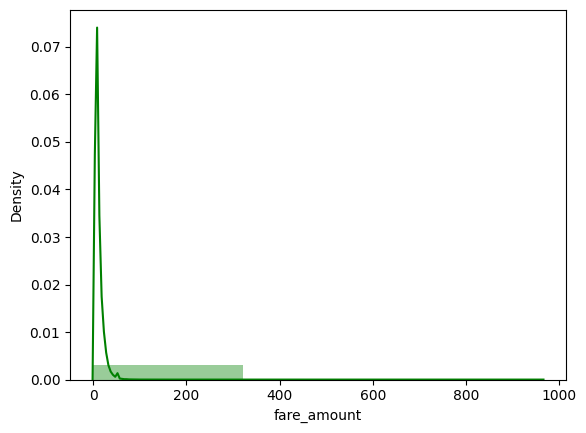

In [55]:
sns.distplot(df_2017['fare_amount'],bins=3, color='green')

## Histogram to show distribution of fare amount

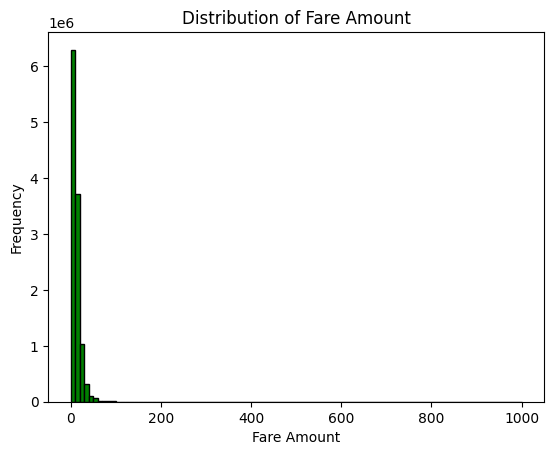

In [39]:
plt.hist(df_2017['fare_amount'], bins=[0,10,20,30,40,50,60,70,100,110,120,130,140,150,160,170,180,190,200,300,400,500,600,700,800,1000], color='green', edgecolor='black')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

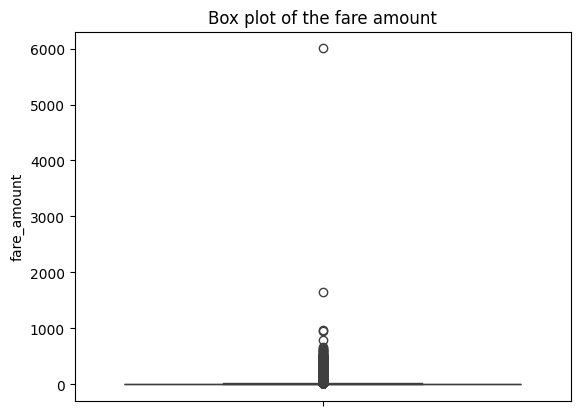

In [30]:
sns.boxplot(df_2017["fare_amount"]).set_title("Box plot of the fare amount")
plt.show()

## dropping rows with fare amount greater than 1000 as these are outliers

In [21]:
df_2017=df_2017[df_2017['fare_amount'] <= 1000]
df_2017.reset_index(drop=True, inplace=True)

## boxplot of fare amount after removing outliers

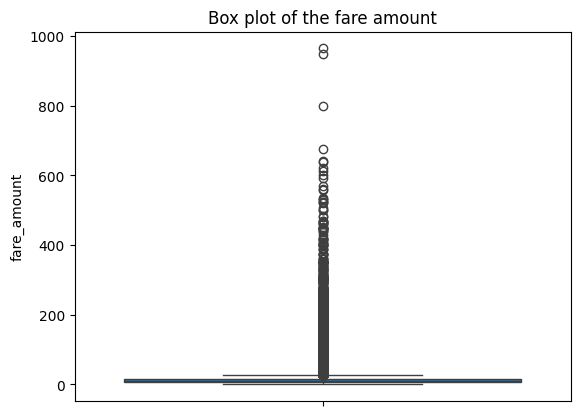

In [32]:
sns.boxplot(df_2017["fare_amount"]).set_title("Box plot of the fare amount")
plt.show()

## Average fare amount by weekdays

C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_16092\2860344243.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_per_trip_by_day = df_2017.groupby('pickup_day')['fare_per_trip'].mean().reset_index()
C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_16092\2860344243.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='pickup_day', y='fare_per_trip', data=average_fare_per_trip_by_day, palette='viridis')


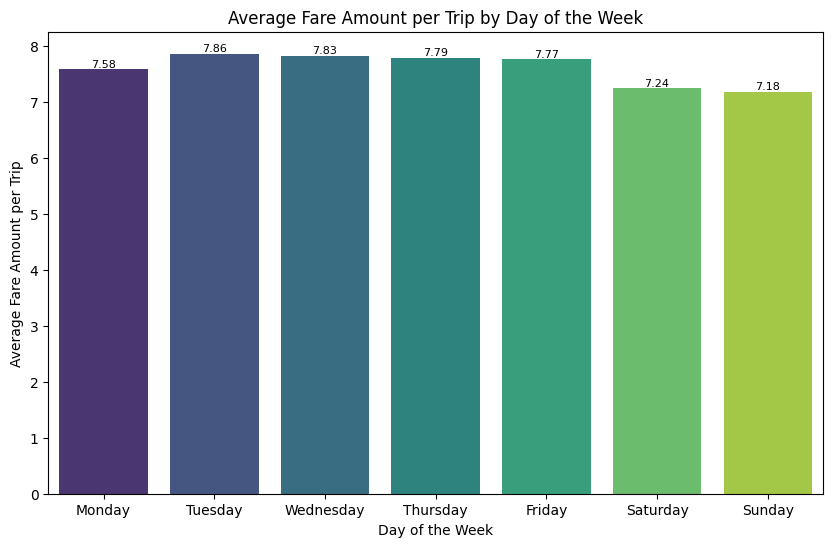

In [44]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_2017['pickup_day'] = pd.Categorical(df_2017['pickup_day'], categories=weekday_order, ordered=True)

# Calculate the average fare amount per trip for each day of the week
df_2017['fare_per_trip'] = df_2017['fare_amount'] / df_2017['trip_distance']
average_fare_per_trip_by_day = df_2017.groupby('pickup_day')['fare_per_trip'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='pickup_day', y='fare_per_trip', data=average_fare_per_trip_by_day, palette='viridis')
plt.title('Average Fare Amount per Trip by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare Amount per Trip')

# Annotate each bar with its corresponding average fare per trip value
for index, value in enumerate(average_fare_per_trip_by_day['fare_per_trip']):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

## Distribution of passengers

C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_13444\4245018722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2017['passenger_count'],bins=30, color='green')


<Axes: xlabel='passenger_count', ylabel='Density'>

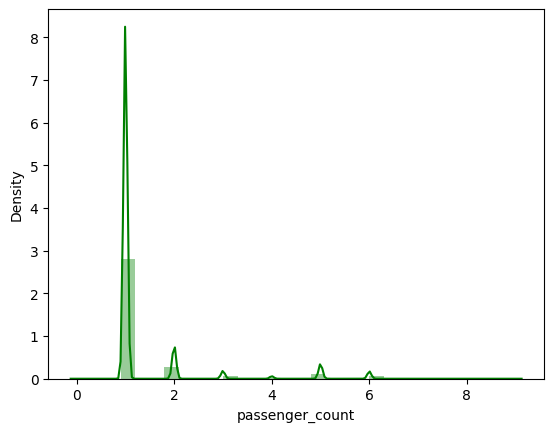

In [53]:
sns.distplot(df_2017['passenger_count'],bins=30, color='green')

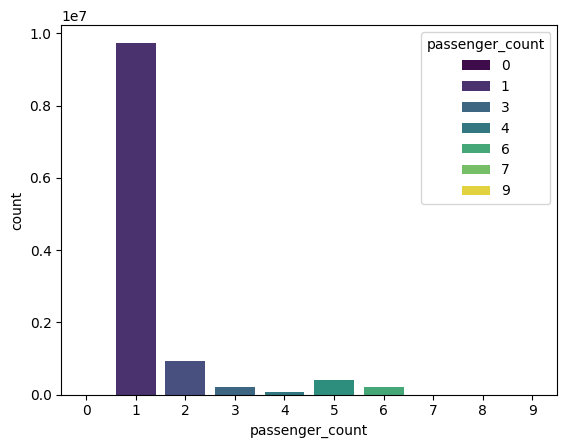

In [23]:
sns.countplot(x='passenger_count', data=df_2017, palette='viridis', hue='passenger_count')
plt.show()

## Scatterplot to show relation between farea amount and trip distance

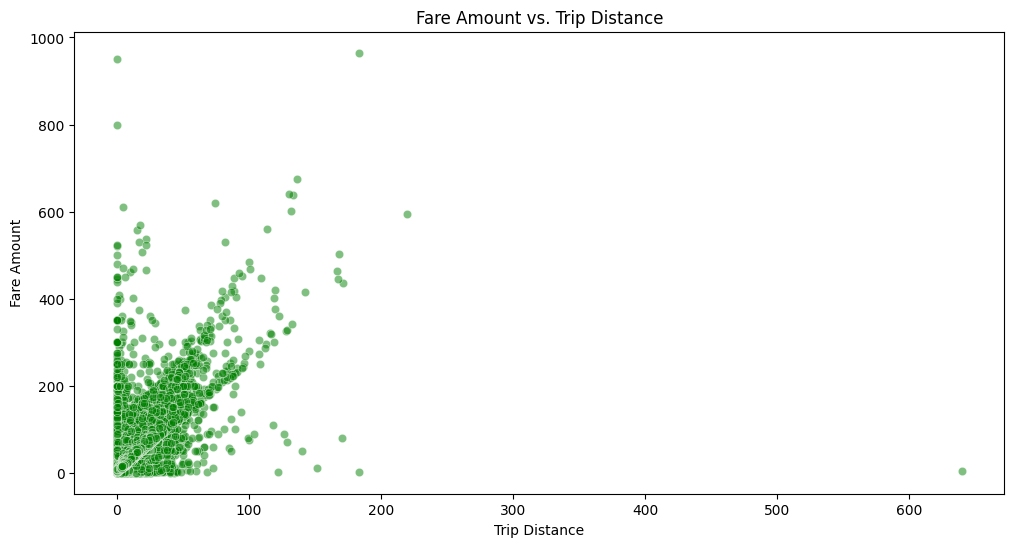

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_2017, alpha=0.5, color='green')
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

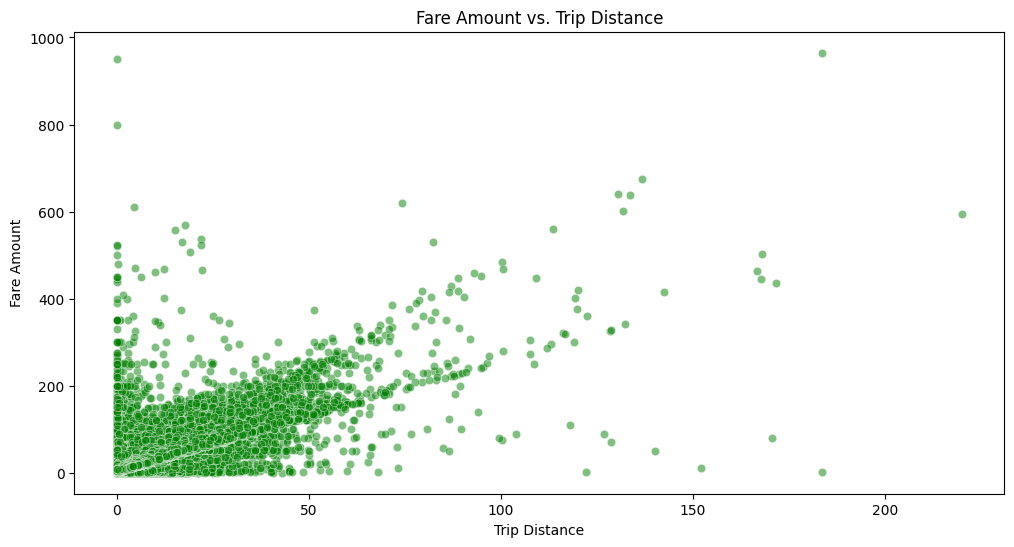

In [42]:
filtered_data = df_2017[df_2017['trip_distance'] < 250]

# Create a scatter plot for the filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_data, alpha=0.5, color='green')

# Adding labels and title
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')

# Display the plot
plt.show()

# Peak time of the day

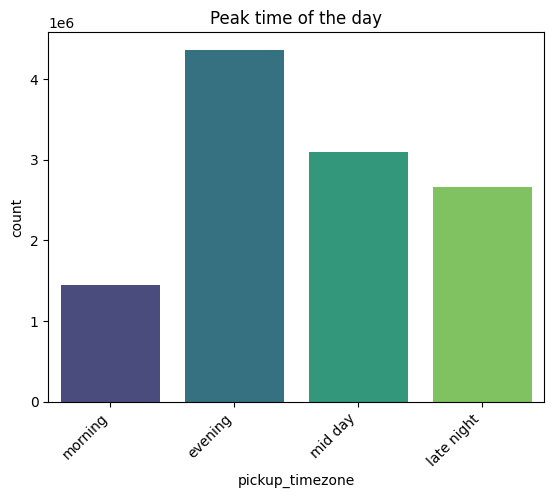

In [26]:
# Distribution of pickups according to time zone

sns.countplot(x='pickup_timezone', data=df_2017, palette='viridis', hue='pickup_timezone')
plt.title('Peak time of the day')
plt.xticks(rotation=45, ha='right')
plt.show()


# Distribution of trips according to time duration

C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_16092\4027996951.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df1, data=df_2017, palette='viridis')  # Set the 'palette' parameter here


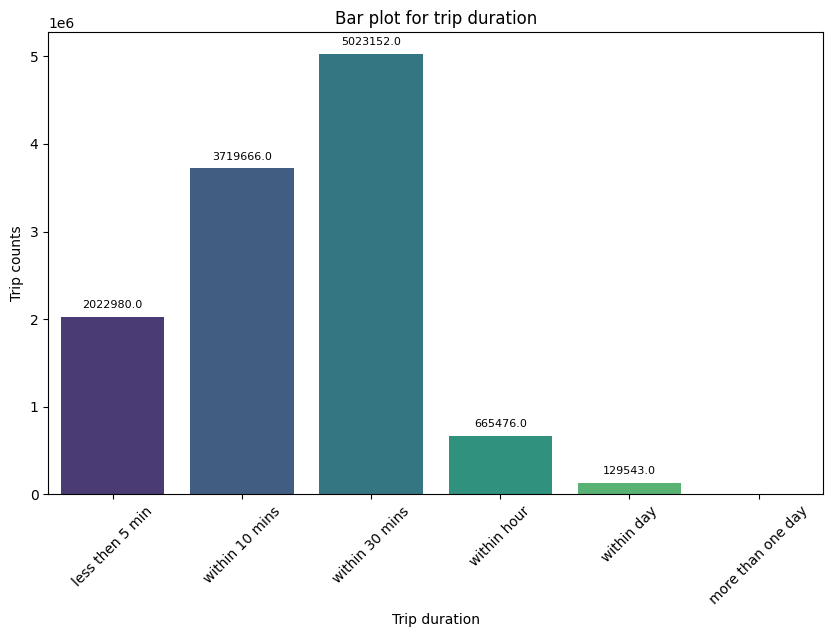

In [51]:


df_2017['trip_duration'] = (df_2017['dropoff_datetime'] - df_2017['pickup_datetime']).dt.seconds

labels=['less then 5 min','within 10 mins','within 30 mins','within hour','within day','more than one day']
        
plt.figure(figsize=[10, 6])
df1 = pd.cut(df_2017['trip_duration'], bins=[0, 300, 600, 1800, 3600, 86400, 259200], labels=labels)
ax = sns.countplot(x=df1, data=df_2017, palette='viridis')  # Set the 'palette' parameter here
plt.title("Bar plot for trip duration")
plt.ylabel("Trip counts")
plt.xlabel("Trip duration")
plt.xticks(rotation=45)

# Annotate each bar with its corresponding trip count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()


# Average number of trips per week

In [31]:
#Average number of trips per week

df_2017['pickup_week_number'] = df_2017['pickup_datetime'].dt.isocalendar().week
trips_per_week = df_2017['pickup_week_number'].value_counts()
average_trips_per_week = trips_per_week.mean()
print(f"Average number of trips per week: {average_trips_per_week}")

Average number of trips per week: 222344.23076923078


# Number of trips by months

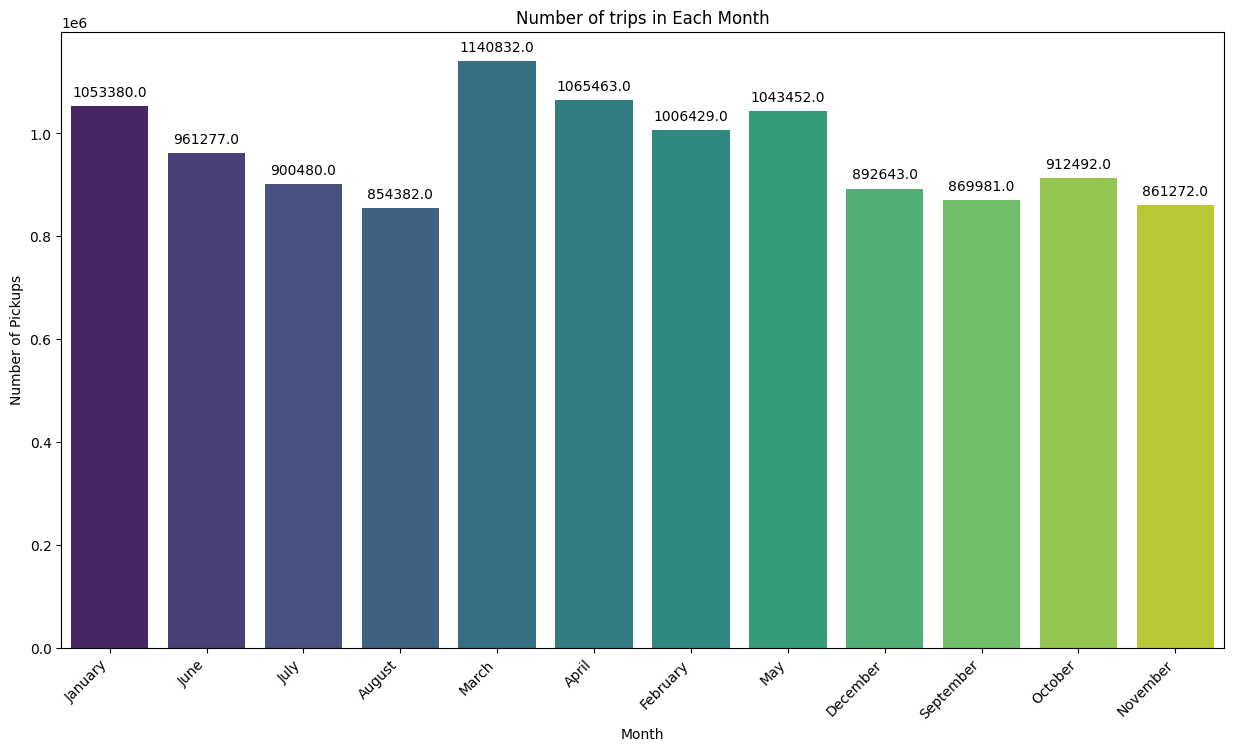

In [48]:

plt.figure(figsize=(15, 8))
plt.xticks(rotation=45, ha='right')

# Create the count plot
ax=sns.countplot(x='pickup_month_name', data=df_2017 , palette='viridis', hue='pickup_month_name')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set plot labels and title
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Number of trips in Each Month")

# Display the plot
plt.show()

# Average distance travelled per week

In [81]:
# Average distance travelled per trip
average_distance_per_trip = df_2017['trip_distance'].mean()

print(f"Average distance traveled per trip: {average_distance_per_trip} miles")

Average distance traveled per trip: 2.7185714802189036 miles


# Busiest days of the week

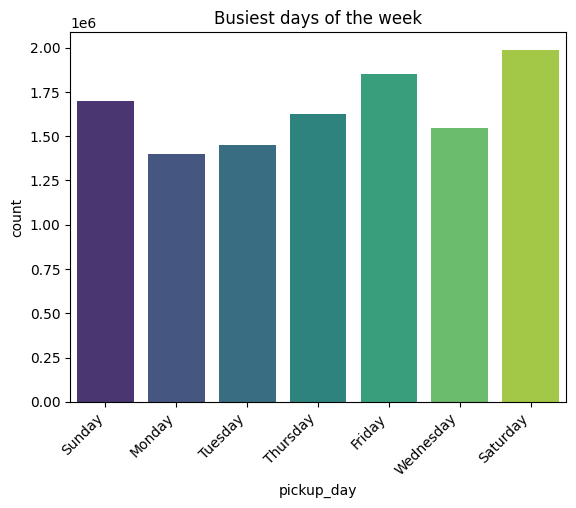

In [50]:
#Number of Pickups on each day of the week


sns.countplot(x='pickup_day', data=df_2017, palette='viridis', hue='pickup_day')
plt.title('Busiest days of the week')
plt.xticks(rotation=45, ha='right')
plt.show()


# Peak hours of the day

C:\Users\Nauman khan\AppData\Local\Temp\ipykernel_5416\1870970250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_2017["pickup_hour"], palette='viridis')


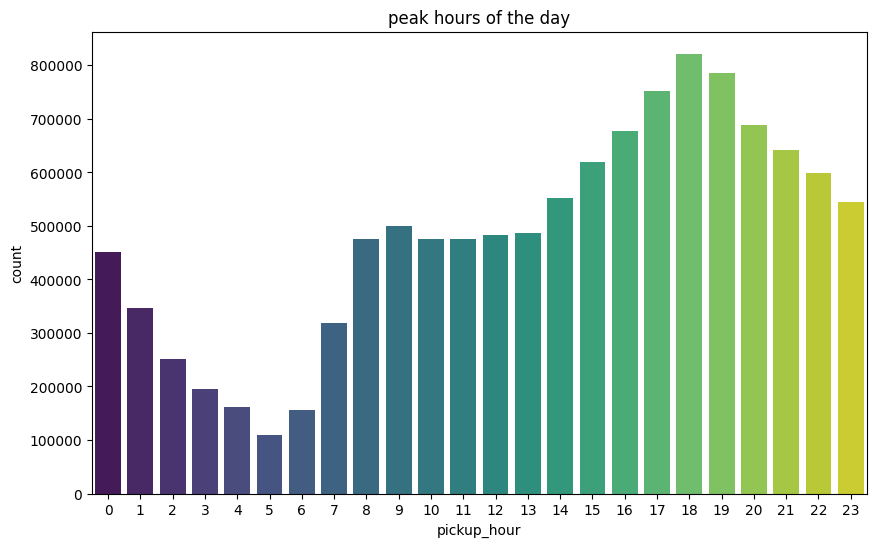

In [27]:
#distribution of ride in complete 24 hours hourly basis
plt.figure(figsize=(10,6))
sns.countplot(x=df_2017["pickup_hour"], palette='viridis')
plt.title("peak hours of the day")
plt.show()

# Loading and exploring taxi zone data set to get location names

In [32]:
df_taxi_zones=pd.read_csv('NYC_Taxi_Trips/taxi_zones.csv')

In [52]:
df_taxi_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [33]:
df_taxi_zones.dropna(inplace=True)

# Concatenating Borough and Zone to get complete location name

In [34]:
df_taxi_zones['location_name'] = df_taxi_zones['Borough'] + ', ' + df_taxi_zones['Zone'].astype(str)

In [56]:
df_taxi_zones.head()

,LocationID,Borough,Zone,service_zone,location_name
0,1,EWR,Newark Airport,EWR,"EWR, Newark Airport"
1,2,Queens,Jamaica Bay,Boro Zone,"Queens, Jamaica Bay"
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,"Bronx, Allerton/Pelham Gardens"
3,4,Manhattan,Alphabet City,Yellow Zone,"Manhattan, Alphabet City"
4,5,Staten Island,Arden Heights,Boro Zone,"Staten Island, Arden Heights"


# Getting location coordinates from geo locator

In [45]:


#geolocator = Nominatim(user_agent="NYC_taxi_analysis")

# Assuming 'location_name' is the column with location names
#result_df1['location'] = result_df1['location_name'] + ", New York"  

# Function to get latitude and longitude
#def get_coordinates(location):
 #   location_info = geolocator.geocode(location)
  #  if location_info:
   #     return location_info.latitude, location_info.longitude
    #else:
     #   return None

# Apply the function to get coordinates for each location
#result_df1['coordinates'] = result_df1['location'].apply(get_coordinates)

# Split the 'coordinates' column into 'latitude' and 'longitude'
#result_df1[['latitude', 'longitude']] = result_df1['coordinates'].apply(pd.Series)
#result_df1

,LocationID,pickup_count,Borough,Zone,service_zone,location_name,location,coordinates,latitude,longitude
0,74,709103,Manhattan,East Harlem North,Boro Zone,"Manhattan, East Harlem North","Manhattan, East Harlem North, New York",None,NaN,NaN
1,41,656842,Manhattan,Central Harlem,Boro Zone,"Manhattan, Central Harlem","Manhattan, Central Harlem, New York",None,NaN,NaN
2,75,619058,Manhattan,East Harlem South,Boro Zone,"Manhattan, East Harlem South","Manhattan, East Harlem South, New York",None,NaN,NaN
3,7,597061,Queens,Astoria,Boro Zone,"Queens, Astoria","Queens, Astoria, New York","(40.78255255, -73.92200822633171)",41,-74
4,82,509822,Queens,Elmhurst,Boro Zone,"Queens, Elmhurst","Queens, Elmhurst, New York","(40.7370812, -73.8800404)",41,-74
5,166,461387,Manhattan,Morningside Heights,Boro Zone,"Manhattan, Morningside Heights","Manhattan, Morningside Heights, New York","(40.8125642, -73.96129536937597)",41,-74
6,255,447288,Brooklyn,Williamsburg (North Side),Boro Zone,"Brooklyn, Williamsburg (North Side)","Brooklyn, Williamsburg (North Side), New York",None,NaN,NaN
7,42,410053,Manhattan,Central Harlem North,Boro Zone,"Manhattan, Central Harlem North","Manhattan, Central Harlem North, New York",None,NaN,NaN
8,181,393441,Brooklyn,Park Slope,Boro Zone,"Brooklyn, Park Slope","Brooklyn, Park Slope, New York","(40.6759573, -73.97472275968875)",41,-74
9,97,370814,Brooklyn,Fort Greene,Boro Zone,"Brooklyn, Fort Greene","Brooklyn, Fort Greene, New York","(40.6887573, -73.97640887345645)",41,-74


In [ ]:
#import folium

# Assuming you have latitude and longitude information in your df_taxi_zones DataFrame
# Replace 'latitude_column' and 'longitude_column' with your actual column names

#latitude_column = 'latitude'
#longitude_column = 'longitude'

# Create a map centered around the first pickup location
#pickup_map = folium.Map(location=[result_df1[latitude_column].iloc[0], result_df1[longitude_column].iloc[0]], zoom_start=12)

# Add markers for each pickup location
#for index, row in result_df1.iterrows():
 #   folium.Marker([row[latitude_column], row[longitude_column]], popup=row['location_name']).add_to(pickup_map)

# Display the map
#pickup_map

# Top 10 pickup location

   LocationID  pickup_count
0          74        709103
1          41        656842
2          75        619058
3           7        597061
4          82        509822
5         166        461387
6         255        447288
7          42        410053
8         181        393441
9          97        370814


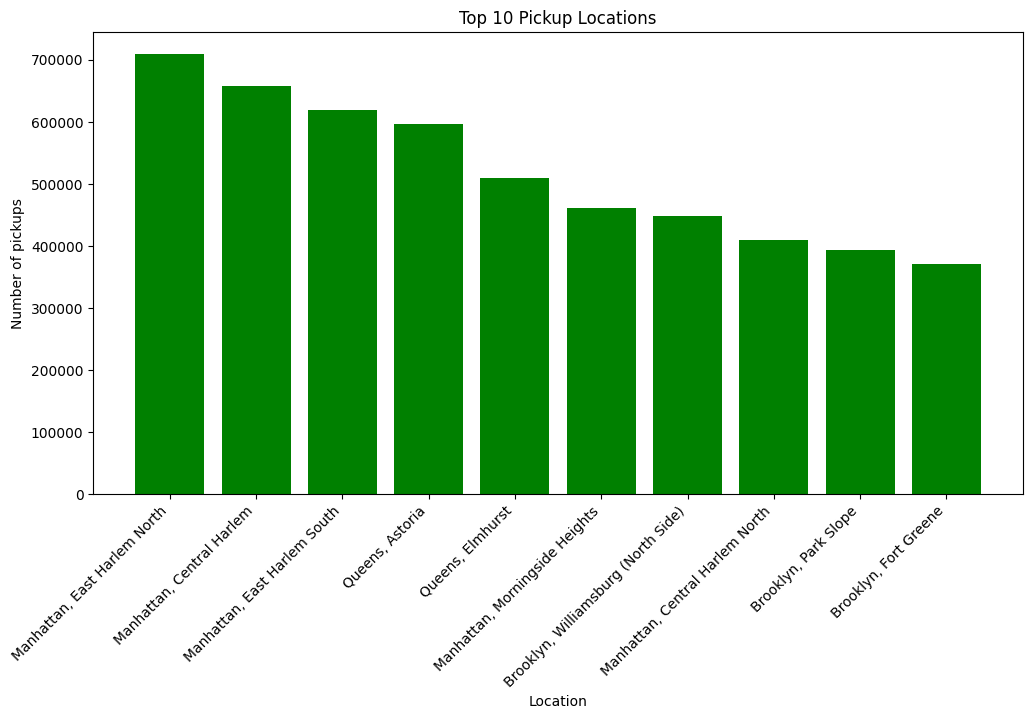

In [46]:
top_pickup_locations = df_2017['pickup_location'].value_counts().head(10)

# Create a new DataFrame with top dropoff locations
df_top_pickup_locations = pd.DataFrame({
    'LocationID': top_pickup_locations.index,
    'pickup_count': top_pickup_locations.values
})
print(df_top_pickup_locations)
df_taxi_zones['LocationID'] = df_taxi_zones['LocationID'].astype(str)
df_top_pickup_locations['LocationID'] = df_top_pickup_locations['LocationID'].astype(str)
result_df1 = pd.merge(df_top_pickup_locations,df_taxi_zones , on='LocationID', how='inner')
#print(result_df)

plt.figure(figsize=(12, 6))
plt.bar(result_df1['location_name'],result_df1['pickup_count'] , color='green')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Location')
plt.ylabel('Number of pickups')
plt.xticks(rotation=45, ha='right')
plt.show()


# Top 10 dropoff locations

In [134]:
top_dropoff_locations = df_2017['dropoff_location'].value_counts().head(10)


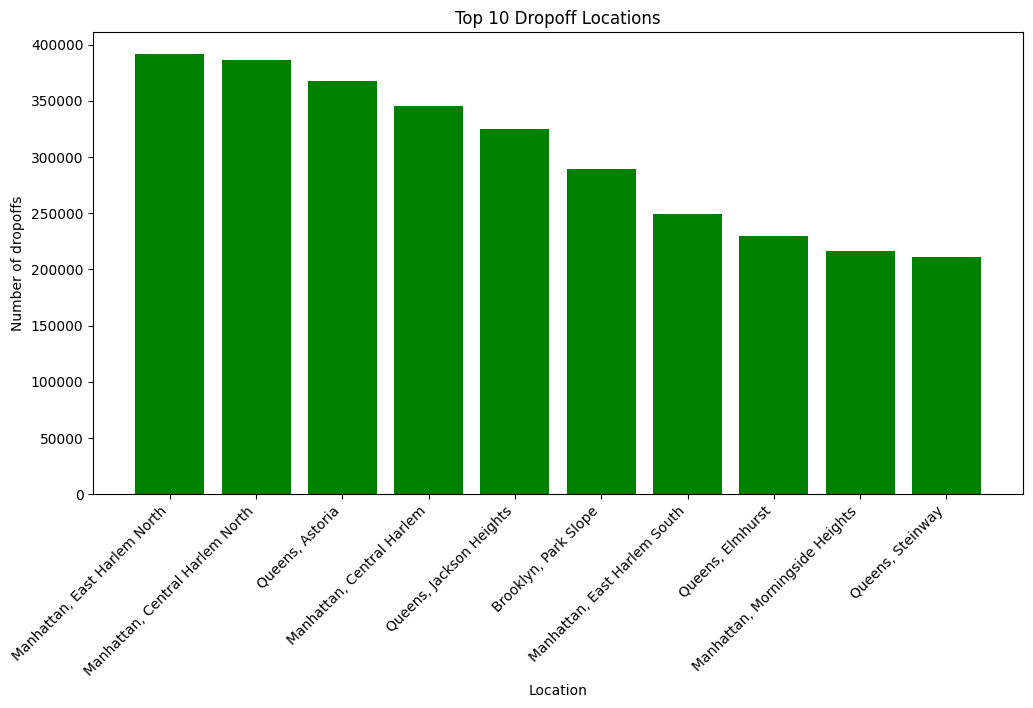

In [135]:

# Create a new DataFrame with top dropoff locations
df_top_dropoff_locations = pd.DataFrame({
    'LocationID': top_dropoff_locations.index,
    'dropoff_count': top_dropoff_locations.values
})
#print(df_top_dropoff_locations)
df_taxi_zones['LocationID'] = df_taxi_zones['LocationID'].astype(str)
df_top_dropoff_locations['LocationID'] = df_top_dropoff_locations['LocationID'].astype(str)
result_df = pd.merge(df_top_dropoff_locations,df_taxi_zones , on='LocationID', how='inner')
#print(result_df)
# Plotting top dropoff locations with names
plt.figure(figsize=(12, 6))
plt.bar(result_df['location_name'],result_df['dropoff_count'] , color='green')
plt.title('Top 10 Dropoff Locations')
plt.xlabel('Location')
plt.ylabel('Number of dropoffs')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation matrix 

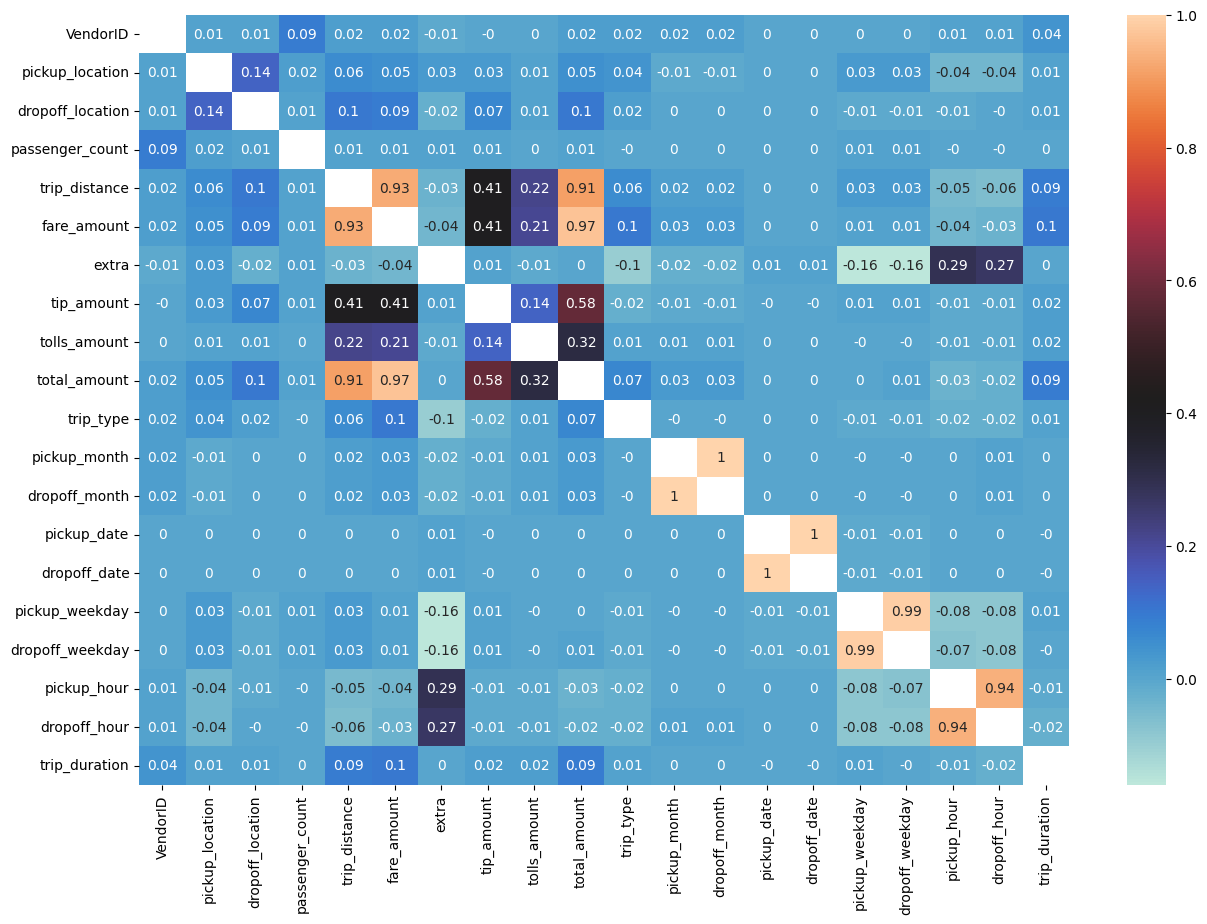

In [61]:
non_numeric_columns = df_2017.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns from the DataFrame
df_numeric = df_2017.drop(non_numeric_columns, axis=1)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr().round(2)

# Set the diagonal to NaN to avoid displaying self-correlation
correlation_matrix *= 1 + np.diag(np.nan*np.ones(len(correlation_matrix)))

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap="icefire")

# Display the plot
plt.show()

# Fitting Linear regression model

In [35]:
m0 = sm.OLS.from_formula("fare_amount ~ trip_distance ", df_2017)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 5.449e+07
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:12:18   Log-Likelihood:            -3.1960e+07
No. Observations:            11561900   AIC:                         6.392e+07
Df Residuals:                11561898   BIC:                         6.392e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8196      0.002   2438.024      0.000       3.817       3.823
trip_distance     2.9490      0.000   7381.690      0.000       2.948       2.950
==================================================================================
Omnibus:                 65553215.289   Durbin-Watson:                       1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   132640099428897936.000
Skew:                         339.167   Prob(JB):                             0.00
Kurtosis:                  524723.550   Cond. No.                             5.62
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Making dummy variables

In [36]:
Month=pd.get_dummies(df_2017['pickup_month'],prefix='pickup_month')
Day=pd.get_dummies(df_2017['pickup_day'],prefix='pickup_day')
time_zone=pd.get_dummies(df_2017['pickup_timezone'],prefix='pickup_timezone')

In [38]:
#df_dummies = pd.get_dummies(df_2017[['pickup_month', 'pickup_day', 'pickup_timezone']], drop_first=True)

# Concatenate dummy variables with the original DataFrame
df_2017_copy = df_2017.copy(deep=True)
df_2017 = pd.concat([df_2017, Month, Day, time_zone], axis=1)

In [40]:
df_2017_copy.head()

,VendorID,pickup_datetime,dropoff_datetime,pickup_location,dropoff_location,passenger_count,trip_distance,fare_amount,extra,tip_amount,...,dropoff_date,pickup_day,dropoff_day,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_timezone,trip_duration,pickup_week_number
0,1,2017-01-01 09:00:01,2017-01-01 09:03:56,74,41,1,1,5,0,0,...,1,Sunday,Sunday,6,6,9,9,morning,235,52
1,1,2017-01-01 18:57:55,2017-01-01 19:01:16,42,41,1,1,5,0,0,...,1,Sunday,Sunday,6,6,18,19,evening,201,52
2,2,2017-01-02 06:55:47,2017-01-02 06:58:54,42,41,1,1,5,0,0,...,2,Monday,Monday,0,0,6,6,morning,187,1
3,2,2017-01-02 14:34:17,2017-01-02 14:39:29,74,41,1,1,5,0,0,...,2,Monday,Monday,0,0,14,14,mid day,312,1
4,1,2017-01-03 06:12:30,2017-01-03 06:15:56,42,41,1,1,5,0,0,...,3,Tuesday,Tuesday,1,1,6,6,morning,206,1


In [39]:
df_2017.dtypes

VendorID                               int64
pickup_datetime               datetime64[ns]
dropoff_datetime              datetime64[ns]
pickup_location                        int64
dropoff_location                       int64
passenger_count                        int64
trip_distance                        float64
fare_amount                          float64
extra                                float64
tip_amount                           float64
tolls_amount                         float64
total_amount                         float64
trip_type                            float64
pickup_month                        category
dropoff_month                       category
pickup_month_name                   category
pickup_date                         category
dropoff_date                        category
pickup_day                          category
dropoff_day                         category
pickup_weekday                      category
dropoff_weekday                     category
pickup_hou

# Fitting and Evaluating linear regression model for fare prediction

In [41]:
X = df_2017.drop(['fare_amount', 'extra','pickup_datetime','dropoff_datetime', 'tip_amount', 'tolls_amount', 'total_amount' , 'trip_type' ,'dropoff_month', 'pickup_month_name', 'pickup_date', 'dropoff_date', 'pickup_day', 'dropoff_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_hour','dropoff_hour','trip_duration', 'pickup_month', 'pickup_day', 'pickup_timezone','pickup_datetime','VendorID','dropoff_datetime', 'pickup_location', 'dropoff_location', 'passenger_count'], axis=1)
y = df_2017['fare_amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(y_test, y_predict)
r_squared = r2_score(y_test,y_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 11.17495563678119
R-squared: 0.8622151277717144


In [37]:
X.columns

Index(['trip_distance', 'pickup_month_1', 'pickup_month_2', 'pickup_month_3',
       'pickup_month_4', 'pickup_month_5', 'pickup_month_6', 'pickup_month_7',
       'pickup_month_8', 'pickup_month_9', 'pickup_month_10',
       'pickup_month_11', 'pickup_month_12', 'pickup_day_Friday',
       'pickup_day_Monday', 'pickup_day_Saturday', 'pickup_day_Sunday',
       'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday',
       'pickup_timezone_evening', 'pickup_timezone_late night',
       'pickup_timezone_mid day', 'pickup_timezone_morning'],
      dtype='object')

# Sample function to predict fare amount according to specific variable values

In [43]:
def predict_fare(model, features):
    
    fare_prediction = model.predict(features.reshape(1, -1))  # Reshape to ensure it's a 2D array
    return fare_prediction[0]

new_features = np.array([4, 0,0,0,0, 0, 0, 0,0, 1, 0,0, 0, 0, 0, 0, 0,1, 0, 0,0, 0,1, 0,0])

predicted_fare = predict_fare(model, new_features)
print("Predicted Fare Amount:", predicted_fare)

Predicted Fare Amount: 14.7879958152771


C:\Users\Nauman khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# check=df_2017[df_2017['trip_distance']==4 && df_2017['pickup_timezone_mid day']==1]
# print(check)